In [1]:
import IPython.core.display as di

# This line will hide code by default when the notebook is exported as HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

# This line will add a button to toggle visibility of code blocks, for use with the HTML export version
di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Toggle code</button>''', raw=True)


Toggle code

# Amazon AI Service -- Rekognition Demo

In [3]:
from IPython.display import Image
import boto3
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import plotly
plotly.offline.init_notebook_mode()
import plotly.plotly as py
import plotly.graph_objs as go
#plotly.tools.set_credentials_file(username='alwaysandeep', api_key='eKZcMTk2w3iXZITbstJ1')


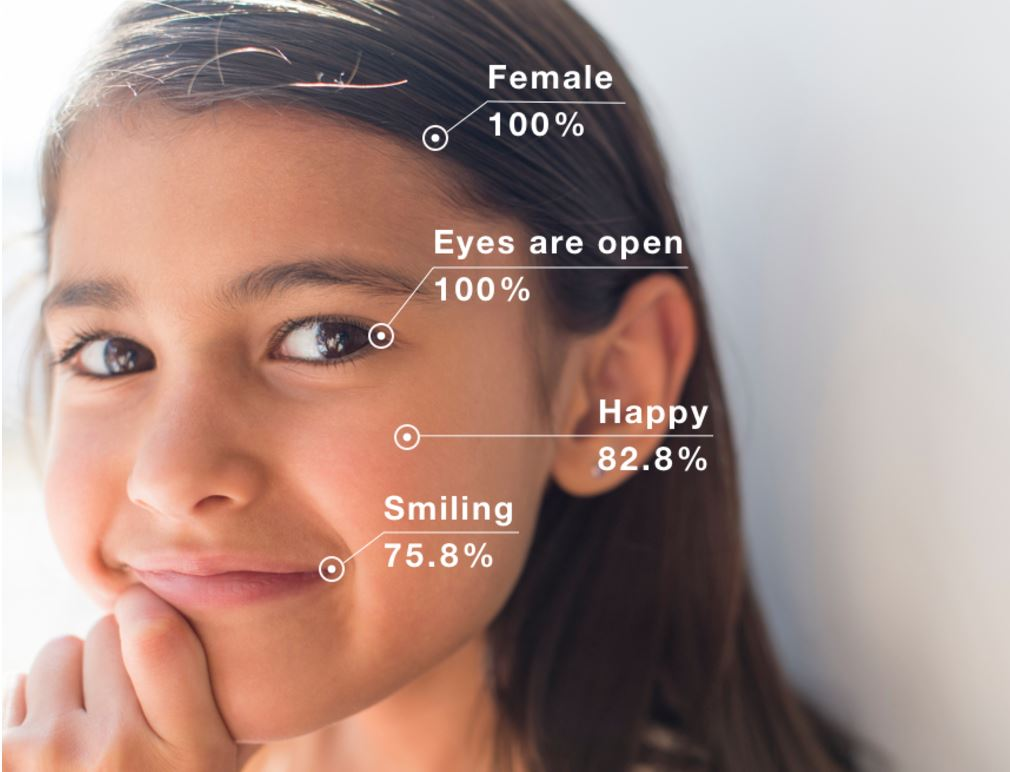

In [4]:
Image("C:/Users/sandeep.chitta/OneDrive for Business/OneDrive - Slalom, LLC/demos/amazon ai/rekognition/official.jpg")

In [5]:
BUCKET = "awsrekognition-demo1"
KEY = "image3.jfif"
FEATURES_BLACKLIST = ("Landmarks", "Emotions", "Pose", "Quality", "BoundingBox", "Confidence")
#us-west-2
#User Defined function
def detect_faces(bucket, key, attributes=['ALL'], region="us-east-1"):
    rekognition = boto3.client("rekognition", region)
    response = rekognition.detect_faces(
        Image={
            "S3Object": {
                "Bucket": bucket,
                "Name": key,
            }
        },
        Attributes=attributes,
    )
    return response['FaceDetails']
def fn_getProperties(x):
    properties=dict()
    # assuming only one face in a picture
    x=x[0]
    a=[u'Confidence',u'Eyeglasses',u'Sunglasses',u'Gender',  u'Emotions', u'AgeRange',u'EyesOpen',  u'Smile',u'MouthOpen',
     u'Mustache',   u'Beard']     
    for i in a:
        properties[i]=x[i]
    
    return properties
def display_facial_analysis(prop):
    data = [go.Bar(
                x=prop['AgeRange'].keys(),
                y=prop['AgeRange'].values()
        )]

    #py.iplot(data, filename='basic-bar',title="Age")
    #data = [trace0]
    layout = go.Layout(
        title='Person Age range',
    )
    fig = go.Figure(data=data, layout=layout)
    plotly.offline.iplot(fig, filename='color-bar')
    data = [go.Bar(
                x=[i['Type'] for i in prop['Emotions']],
                y=[i['Confidence'] for i in prop['Emotions']]
        )]

    #py.iplot(data, filename='basic-bar',title="Age")
    #data = [trace0]
    layout = go.Layout(
        title='Person Emotions with Confidence',
    )
    fig = go.Figure(data=data, layout=layout)
    plotly.offline.iplot(fig, filename='color-bar')
    data = [go.Bar(
                x=[str(prop['Smile']['Value'])],
                y=[prop['Smile']['Confidence']]
        )]

    #py.iplot(data, filename='basic-bar',title="Age")
    #data = [trace0]
    layout = go.Layout(
        title='Smile',
    )
    fig = go.Figure(data=data, layout=layout)
    plotly.offline.iplot(fig, filename='color-bar')

## Image-1 

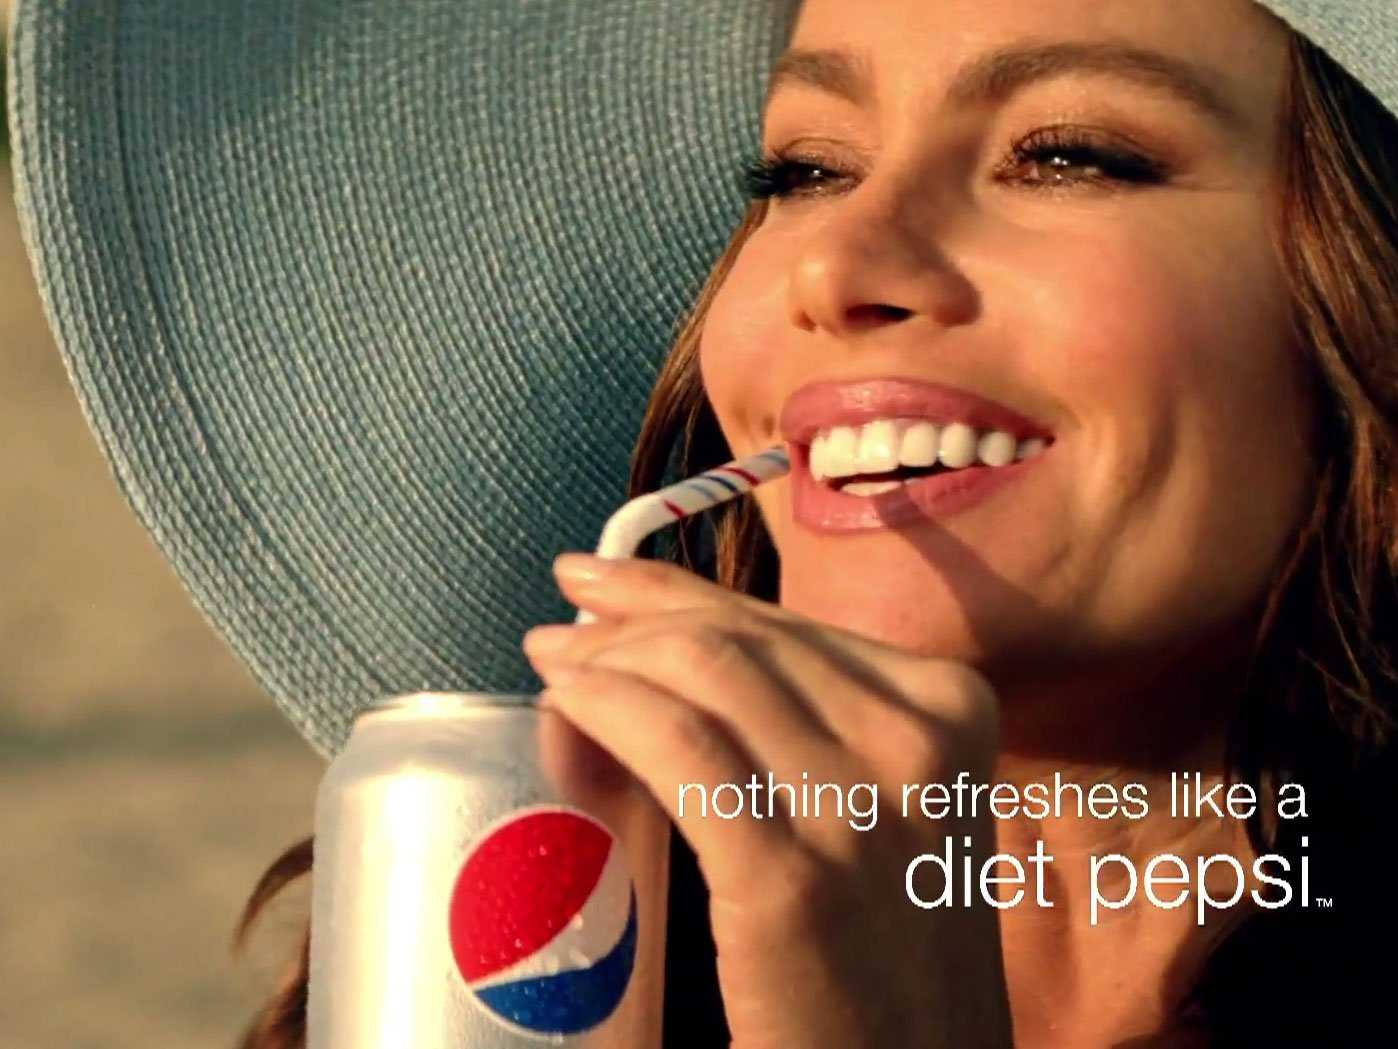

In [6]:
Image("C:/Users/sandeep.chitta/OneDrive for Business/OneDrive - Slalom, LLC/demos/amazon ai/rekognition/image2.jpg")

In [7]:
#detect_faces(BUCKET, "image2.jpg")
### attributes like age, emotions can be accessable through a json file. For reference please find below
prop=fn_getProperties(detect_faces(BUCKET, "image2.jpg"))
display_facial_analysis(prop)

## Image-2

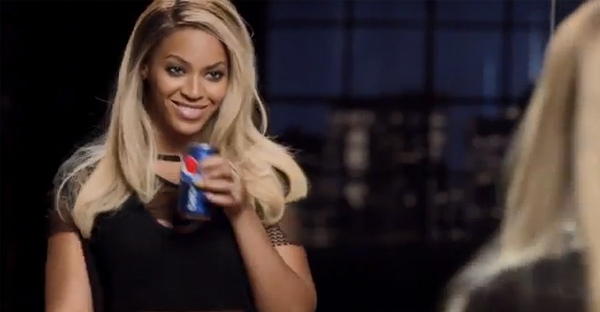

In [12]:
Image("C:/Users/sandeep.chitta/OneDrive for Business/OneDrive - Slalom, LLC/demos/amazon ai/rekognition/image1.jpg")

In [11]:
#detect_faces(BUCKET, "image3.jfif")
prop=fn_getProperties(detect_faces(BUCKET, "image1.jpg"))
#prop=fn_getProperties(detect_faces(BUCKET, "image3.jfif"))
display_facial_analysis(prop)

## Image-3

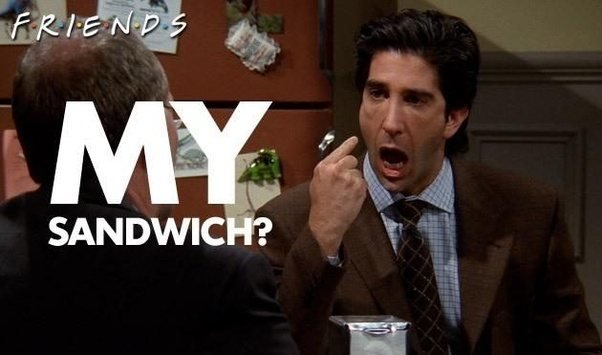

In [13]:
Image("C:/Users/sandeep.chitta/OneDrive for Business/OneDrive - Slalom, LLC/demos/amazon ai/rekognition/ross.jpg")

In [14]:
#detect_faces(BUCKET, "image4.jfif")
prop=fn_getProperties(detect_faces(BUCKET, "ross.jpg"))
display_facial_analysis(prop)

## Image-4

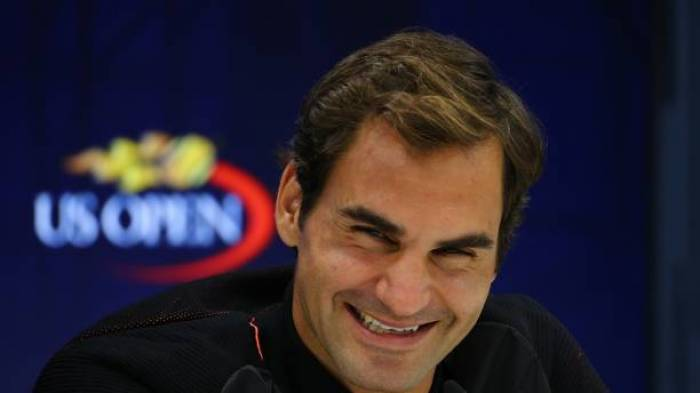

In [15]:
Image("C:/Users/sandeep.chitta/OneDrive for Business/OneDrive - Slalom, LLC/demos/amazon ai/rekognition/fed.jpg")

In [16]:
#detect_faces(BUCKET, "image4.jfif")
prop=fn_getProperties(detect_faces(BUCKET, "fed.jpg"))
display_facial_analysis(prop)